In [4]:

from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units
# Use Asap for a huge performance increase if it is installed
use_asap = True

if use_asap:
    from asap3 import EMT
    size = 10
else:
    from ase.calculators.emt import EMT
    size = 3

# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol='Cu',
                          size=(size, size, size),
                          pbc=True)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 5 * units.fs)  # 5 fs time step.


def printenergy(a):
    """Function to print the potential, kinetic and total energy"""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


# Now run the dynamics
printenergy(atoms)
for i in range(20):
    dyn.run(10)
    printenergy(atoms)

Energy per atom: Epot = -0.001eV  Ekin = 0.038eV (T=296K)  Etot = 0.038eV
Energy per atom: Epot = 0.029eV  Ekin = 0.009eV (T= 68K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=144K)  Etot = 0.038eV
Energy per atom: Epot = 0.017eV  Ekin = 0.020eV (T=158K)  Etot = 0.038eV
Energy per atom: Epot = 0.017eV  Ekin = 0.021eV (T=160K)  Etot = 0.038eV
Energy per atom: Epot = 0.020eV  Ekin = 0.017eV (T=135K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=146K)  Etot = 0.038eV
Energy per atom: Epot = 0.018eV  Ekin = 0.020eV (T=152K)  Etot = 0.038eV
Energy per atom: Epot = 0.018eV  Ekin = 0.020eV (T=154K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=143K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=147K)  Etot = 0.038eV
Energy per atom: Epot = 0.018eV  Ekin = 0.019eV (T=151K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T=148K)  Etot = 0.038eV
Energy per atom: Epot = 0.019eV  Ekin = 0.019eV (T

In [2]:
"""Demonstrates molecular dynamics with constant energy."""

from ase.lattice.cubic import FaceCenteredCubic
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase import units

# Use Asap for a huge performance increase if it is installed
use_asap = False

if use_asap:
    from asap3 import EMT
    size = 10
else:
    from ase.calculators.emt import EMT
    size = 3

# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol="Cu",
                          size=(size, size, size),
                          pbc=True)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# Set the momenta corresponding to T=300K
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# We want to run MD with constant energy using the VelocityVerlet algorithm.
dyn = VelocityVerlet(atoms, 5 * units.fs)  # 5 fs time step.


def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


# Now run the dynamics
dyn.attach(printenergy, interval=-190)
printenergy()
dyn.run(200)

Energy per atom: Epot = -0.006eV  Ekin = 0.040eV (T=309K)  Etot = 0.034eV
Energy per atom: Epot = 0.012eV  Ekin = 0.022eV (T=170K)  Etot = 0.034eV


True

In [4]:
"""Demonstrates molecular dynamics with constant temperature."""
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory
from ase import units

from asap3 import EMT  # Way too slow with ase.EMT !
size = 5

T = 1500  # Kelvin

# Set up a crystal
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          symbol="Cu",
                          size=(size, size, size),
                          pbc=False)

# Describe the interatomic interactions with the Effective Medium Theory
atoms.calc = EMT()

# We want to run MD with constant energy using the Langevin algorithm
# with a time step of 5 fs, the temperature T and the friction
# coefficient to 0.02 atomic units.
dyn = Langevin(atoms, 5 * units.fs, T * units.kB, 0.002)


def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.3feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


dyn.attach(printenergy, interval=50)

# We also want to save the positions of all atoms after every 100th time step.
traj = Trajectory('moldyn3.traj', 'w', atoms)
dyn.attach(traj.write, interval=50)

# Now run the dynamics
printenergy()
dyn.run(5000)

/home/snilsson/.local/lib/python3.8/site-packages/ase/md/md.py:48: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


Energy per atom: Epot = 0.269eV  Ekin = 0.000eV (T=  0K)  Etot = 0.269eV
Energy per atom: Epot = 0.269eV  Ekin = 0.000eV (T=  0K)  Etot = 0.269eV
Energy per atom: Epot = 0.274eV  Ekin = 0.012eV (T= 95K)  Etot = 0.287eV
Energy per atom: Epot = 0.282eV  Ekin = 0.023eV (T=175K)  Etot = 0.305eV
Energy per atom: Epot = 0.293eV  Ekin = 0.029eV (T=223K)  Etot = 0.322eV
Energy per atom: Epot = 0.300eV  Ekin = 0.036eV (T=278K)  Etot = 0.336eV
Energy per atom: Epot = 0.309eV  Ekin = 0.043eV (T=330K)  Etot = 0.351eV
Energy per atom: Epot = 0.316eV  Ekin = 0.050eV (T=383K)  Etot = 0.366eV
Energy per atom: Epot = 0.320eV  Ekin = 0.058eV (T=451K)  Etot = 0.378eV
Energy per atom: Epot = 0.333eV  Ekin = 0.059eV (T=453K)  Etot = 0.392eV
Energy per atom: Epot = 0.336eV  Ekin = 0.068eV (T=525K)  Etot = 0.404eV
Energy per atom: Epot = 0.348eV  Ekin = 0.070eV (T=542K)  Etot = 0.418eV
Energy per atom: Epot = 0.356eV  Ekin = 0.075eV (T=583K)  Etot = 0.431eV
Energy per atom: Epot = 0.356eV  Ekin = 0.085eV (T=

True

49


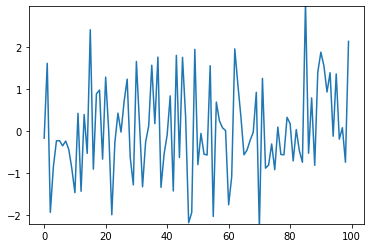

In [11]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.randn(100))

tstart = time.time()
num_plots = 0
while time.time()-tstart < 1:
    line.set_ydata(np.random.randn(100))
    fig.canvas.draw()
    num_plots += 1
print(num_plots)

In [3]:
FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],symbol="Cu")

Lattice(symbols='Cu4', pbc=True, cell=[3.61, 3.61, 3.61])

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.HTML.widgets import interactive
from IPython.display import display
import numpy as np

fig, ax = plt.subplots()
ax.set_xlim(0, .25)
ax.set_ylim(-2.5, 2.5)
ax.set_title('beat frequencies')
lnA, = ax.plot([], [], color='r', label='A')
lnB, = ax.plot([], [], color='purple', label='B')
lnsum, = ax.plot([], [], color='k', label='signal')
ax.legend()
max_time = 3
rate = 8000
times = np.linspace(0,max_time,rate*max_time)

def beat_freq(f1=220.0, f2=224.0):

    A = np.sin(2*np.pi*f1*times)
    B = np.sin(2*np.pi*f2*times)
    sig = A + B

    lnA.set_data(times, A)
    lnB.set_data(times, B)
    lnsum.set_data(times, sig)

    plt.draw()

beat_freq(0, 0)

ModuleNotFoundError: No module named 'IPython.HTML'